# Two samples from torus

In [2]:
using Pkg  # Import the Pkg module for package management in Julia
Pkg.activate("../env/.")  # Activate the environment located at "../env/."
Pkg.instantiate()  # Install the packages specified in the environment's Project.toml and Manifest.toml files

  Activating project at `~/Documents/Github/analogous_neural/env`
Precompiling project...
  ✓ OpenSSL
  ✓ Blosc_jll
  ✓ Blosc
  ✓ HTTP
  ✓ H5Zblosc
  ✓ WebSockets
  ✓ Mux
  ✓ JLD
  ✓ Blink
  9 dependencies successfully precompiled in 15 seconds. 243 already precompiled.


In [4]:
#using Conda
#Conda.pip_interop(true)
#Conda.pip("install", "webio_jupyter_extension")

In [6]:
# Include the necessary Julia source files for the project
include("../src/analogous_bars.jl")  # Includes the analogous_bars module
include("../src/Eirene_var.jl")      # Includes the Eirene_var module

# Use the included modules and other necessary libraries
using .analogous_bars  # Use the analogous_bars module
using .Eirene_var      # Use the Eirene_var module
using DelimitedFiles    # For reading and writing delimited text files
using Plots             # For creating visualizations and plots
using CSV               # For reading and writing CSV files
using Distances         # For calculating distances between points
using HDF5              # For reading and writing HDF5 files
using JLD               # For saving and loading Julia data in JLD format
using DataStructures    # For using various data structures

[ Info: Precompiling Blink [ad839575-38b3-5650-b840-f874b8c74a25]


WebIO._IJuliaInit()

Precompiling JLD
  ✓ HDF5_jll
  ✓ HDF5
  ✓ H5Zblosc
  ✓ JLD
  4 dependencies successfully precompiled in 10 seconds. 27 already precompiled.
[ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
┌ Warning: Module OpenSSL_jll with build ID fafbfcfd-8cdf-372f-000f-17c671040bfd is missing from the cache.
│ This may mean OpenSSL_jll [458c3c95-2e84-50aa-8efc-19380b2a3a95] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8].
[ Info: Precompiling HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f]
┌ Warning: Module OpenSSL_jll with build ID fafbfcfd-8cdf-372f-000f-17c671040bfd is missing from the cache.
│ This may mean OpenSSL_jll [458c3c95-2e84-50aa-8efc-19380b2a3a95] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing HD

# 1. Load data 

In [8]:
# Load the dataset from the specified file
data = load("data/torus_two_samples/data.jld")

# Extract the 3D coordinates for points P
P = data["P"] # 3 dimensional coordinates for set P
P_theta = data["P_theta"] # Angular coordinate theta for set P
P_phi = data["P_phi"] # Angular coordinate phi for set P

# Extract the 3D coordinates for points Q
Q = data["Q"] # 3 dimensional coordinates for set Q
Q_theta = data["Q_theta"] # Angular coordinate theta for set Q
Q_phi = data["Q_phi"] # Angular coordinate phi for set Q

# Print the number of points in set P
print("number of points in P: ", size(P,1), "\n")

# Print the number of points in set Q
print("number of points in Q: ", size(Q,1))

# Assign colors for visualization of points P and Q
P_color = "#ff8d00" # Color for points in set P
Q_color = "#008181" # Color for points in set Q

number of points in P: 150
number of points in Q: 150

"#008181"

In [12]:
# Combine the P_theta and P_phi matrices horizontally to create a 2D matrix P_2d
P_2d = hcat(P_theta, P_phi)

# Combine the Q_theta and Q_phi matrices horizontally to create a 2D matrix Q_2d
Q_2d = hcat(Q_theta, Q_phi);

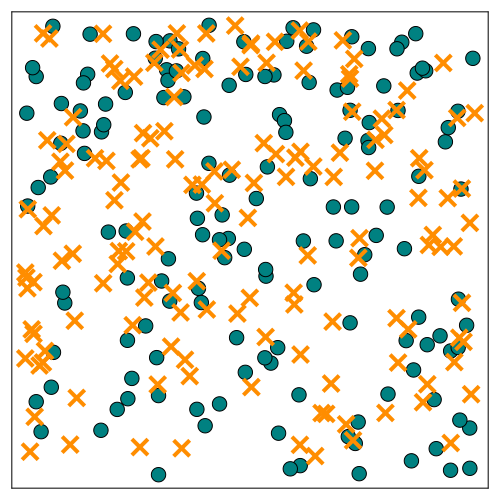

In [14]:
# Create a plot with a box frame and no axes
p = plot(framestyle = :box, yaxis = nothing, xaxis = nothing,
        size = (500, 500))

# Add scatter plot for P_2d data points
scatter!(p, P_2d[:,1], P_2d[:,2], color = "#008181", 
            label = "",  # No label for the legend
            markersize = 8,  # Size of the markers
            marker = :circle)  # Shape of the markers

# Add scatter plot for Q_2d data points
scatter!(p, Q_2d[:,1], Q_2d[:,2], color = "#ff8d00", 
            label = "",  # No label for the legend
            markersize = 8,  # Size of the markers
            marker = :xcross,  # Shape of the markers
            markerstrokewidth = 4  # Width of the marker stroke
            )

# Uncomment the following line to save the plot as a PDF file
# savefig("data/torus_two_samples/points.pdf")

# Display the plot
plot(p)

In [16]:
# compute distance matrices
all_theta = vcat(P_theta, Q_theta)  # Concatenate P_theta and Q_theta vertically
all_phi = vcat(P_phi, Q_phi)          # Concatenate P_phi and Q_phi vertically
D = compute_distance_square_torus(all_theta, all_phi)  # Compute the distance matrix for the concatenated parameters
n = size(P_theta)[1]  # Get the number of rows in P_theta

# get submatrices
D_P = D[1:n, 1:n]  # Extract the submatrix corresponding to distances within P
D_Q = D[n+1:end, n+1:end]  # Extract the submatrix corresponding to distances within Q
D_P_Q = D[1:n, n+1:end]  # Extract the submatrix corresponding to distances between P and Q
D_Q_P = D[n+1:end, 1:n]  # Extract the submatrix corresponding to distances between Q and P

In [18]:
# Compute Vietoris-Rips persistence on two regions
dim = 1  # Set the dimension for persistence computation
VR_P = eirene(D_P, record = "all", maxdim = dim)  # Compute Vietoris-Rips persistence for region P
VR_Q = eirene(D_Q, record = "all", maxdim = dim)  # Compute Vietoris-Rips persistence for region Q

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim)  # Compute Witness persistence for the combined data D_P_Q

In [38]:
# Generate the persistence barcode for the variable VR_P with dimension 1
barcode_VR_P = barcode(VR_P, dim = 1)
#println(barcode_VR_P)
# Generate the persistence barcode for the output of W_P with dimension 1
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
# Generate the persistence barcode for the variable VR_Q with dimension 1
barcode_VR_Q = barcode(VR_Q, dim = 1);


[0.3292476577458604 0.3376303849408379; 0.3901315594570544 0.3921108136197602; 0.41334741798579017 0.4840400677503961; 0.45656902351497913 0.48440636272504156; 0.5199795406455668 0.5585778136312806; 0.6065643802962758 0.6185659167766973; 0.6314638277220409 0.6944471348768275; 0.6781080191058084 0.7272215575504742; 0.7561558511138575 0.7637444131463306; 0.8517257891396897 0.8565826312029529; 0.9566879306616823 0.9807635638730032; 0.4952374293843264 0.6566717277928056; 0.496440919237951 0.6044745068623716; 0.5059815135965802 0.5274534314853125; 0.5404066988455857 0.7053735669350317; 0.562979045881281 0.5979569661653102; 0.5777680833456341 0.9901032097228721; 0.6036804680548721 0.6809508070721043; 0.6287075860010929 0.681375557169046; 0.6434476846065857 0.9324031874982178; 0.646555195028705 0.8440702738851176; 0.6729466538149476 0.7088203199502322; 0.7115880386156735 0.7776265677448231; 0.7799001262828877 0.8394311613992447; 0.7812338770800494 0.861962323471836; 0.8208791055382397 0.98544

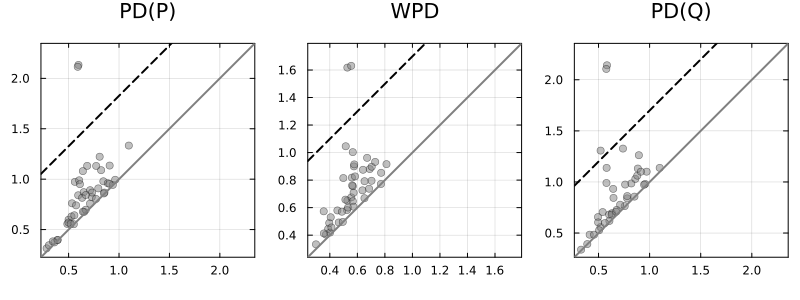

In [24]:
# Select persistent intervals for the barcode of VR_P using the IQR method
selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_VR_P)

# Select persistent intervals for the barcode of W_P using the IQR method
selected_W, cutoff_W = select_persistent_intervals_IQR(barcode_W_P)

# Select persistent intervals for the barcode of VR_Q using the IQR method
selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)

# Plot the persistence diagram for VR_P with the specified cutoff and title
p1 = plot_PD(barcode_VR_P, cutoff=cutoff_P, title="PD(P)")

# Plot the persistence diagram for W_P with the specified cutoff and title
p2 = plot_PD(barcode_W_P, cutoff=cutoff_W, title="WPD")

# Plot the persistence diagram for VR_Q with the specified cutoff and title
p3 = plot_PD(barcode_VR_Q, cutoff=cutoff_Q, title="PD(Q)")

# Display all three persistence diagrams in a single row layout
plot(p1, p2, p3, layout=grid(1, 3), size=(800, 300))

# Run analogous cycles

In [10]:
# Run baseline similarity analysis to find analogous pairs
analogous_P, analogous_Q = run_baseline_similarity_analogous(
    VR_P = VR_P,  # Input variable for P
    D_P = D_P,    # Input data for P
    VR_Q = VR_Q,  # Input variable for Q
    D_Q = D_Q,    # Input data for Q
    W_PQ = W_P,   # Weighting for P and Q
    W_PQ_bars = selected_W  # Selected weights for the analysis
)

# Organize output to identify significant analogous cycles
analogous_P_significant, analogous_Q_significant = analogous_cycles_significant(
    analogous_P, 
    analogous_Q, 
    significant_P = selected_P  # Selected significant pairs for P
)

# Print results for each significant analogous pair
for k in keys(analogous_P_significant)
    println("*** Printing analogous pair *** ")
    println("In P: ", analogous_P_significant[k])  # Output for P
    println("In Q: ", analogous_Q_significant[k])  # Output for Q
end 

*** Printing analogous pair *** 
In P: [45]
In Q: [40]
*** Printing analogous pair *** 
In P: [47]
In Q: [39, 38]


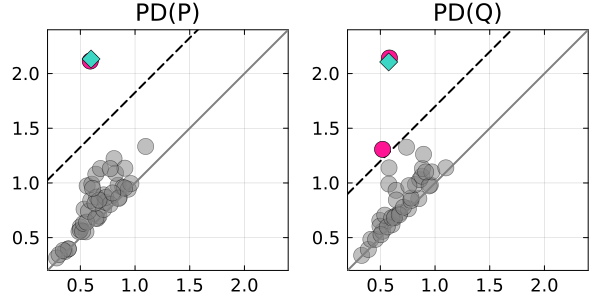

In [26]:
# plot all persistence diagrams & significance feature cutoff

# Create an index of persistence diagrams for P, excluding specific indices
P_idx = [i for i in 1:size(barcode_VR_P,1) if i ∉ [45, 47]]

# Plot the persistence diagram for P with specified parameters
p1 = plot_PD(barcode_VR_P[P_idx,:]; 
            #highlight = [47],  # Uncomment to highlight specific feature
            title = "PD(P)",  # Title of the plot
            cutoff = cutoff_P,  # Significance feature cutoff
            titlefontsize = 16,  # Font size for the title
            tickfontsize = 12,  # Font size for the ticks
            markersize = 9,  # Size of the markers
            pd_min = 0.2,  # Minimum value for the persistence diagram
            pd_max = 2.4)  # Maximum value for the persistence diagram

# Add a scatter plot for the excluded index 47 in deep pink color
scatter!(p1, [barcode_VR_P[47,1]], [barcode_VR_P[47,2]],
            markersize = 9, label = "", 
            c = :deeppink)

# Add a scatter plot for the excluded index 45 in a diamond shape and teal color
scatter!(p1, [barcode_VR_P[45,1]], [barcode_VR_P[45,2]],
            markersize = 9, label = "", 
            markershape = :diamond,
            c = "#3cd7c4")

# Create an index of persistence diagrams for Q, excluding specific indices
Q_idx = [i for i in 1:size(barcode_VR_Q,1) if i ∉ [38, 39, 40]]

# Plot the persistence diagram for Q with specified parameters
p2 = plot_PD(barcode_VR_Q[Q_idx, :]; 
             title = "PD(Q)",  # Title of the plot
            cutoff = cutoff_Q,  # Significance feature cutoff
            markersize = 9,  # Size of the markers
            tickfontsize = 12,  # Font size for the ticks
            titlefontsize = 16,  # Font size for the title
            pd_min = 0.2,  # Minimum value for the persistence diagram
            pd_max = 2.4)  # Maximum value for the persistence diagram

# Add a scatter plot for the excluded indices 38 and 39 in deep pink color
scatter!(p2, [barcode_VR_Q[[38, 39],1]], [barcode_VR_Q[[38, 39],2]],label ="",
            markersize = 9,
            c = :deeppink)

# Add a scatter plot for the excluded index 40 in a diamond shape and teal color
scatter!(p2, [barcode_VR_Q[40,1]], [barcode_VR_Q[40,2]],label ="",
            markersize = 9,
            c = "#3cd7c4",
            markershape = :diamond)

# Combine the two persistence diagrams into a single plot with a grid layout
plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/torus_two_samples/analogous_cycles.pdf")  # Uncomment to save the figure

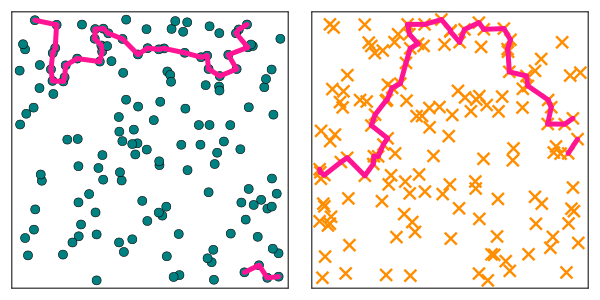

In [28]:
# Get the cycle representation for the parameter VR_P at index 47
cr_P = get_cyclerep_Eirene(VR_P, 47)

# Get the cycle representations for the parameter VR_Q at indices 38 and 39
cr_Q_38 = get_cyclerep_Eirene(VR_Q, 38)
cr_Q_39 = get_cyclerep_Eirene(VR_Q, 39)

# Combine the cycle representations from indices 38 and 39 into a single list
cr_Q_combined = [cr_Q_38; cr_Q_39]

# Sort each item in the combined cycle representation list
v = [sort(item) for item in cr_Q_combined]

# Count the occurrences of each unique cycle representation
count = counter(v)

# Filter the cycles that occur exactly once
cr_Q = [k for (k,v) in count if v == 1]

# Plot the cycle representation for cr_P on a square torus with specified parameters
p1 = plot_cycle_single_square_torus(P_2d, cycle = cr_P, title = ""; 
                                    legend = false,
                                    markersize = 5,
                                    c = "#008181")

# Plot the cycle representation for cr_Q on a square torus with specified parameters
p2 = plot_cycle_single_square_torus(Q_2d, cycle = cr_Q, title = ""; 
                                    markersize = 6, 
                                    marker = :xcross,
                                    markerstrokewidth = 4,
                                    c = "#ff8d00",
                                    legend = false)

# Combine the two plots into a single layout with specified size
plot(p1, p2, layout = grid(1,2), size = (600, 300))

# Uncomment the following line to save the plot as a PDF file
#savefig("data/torus_two_samples/analogous_cycle_rep.pdf")

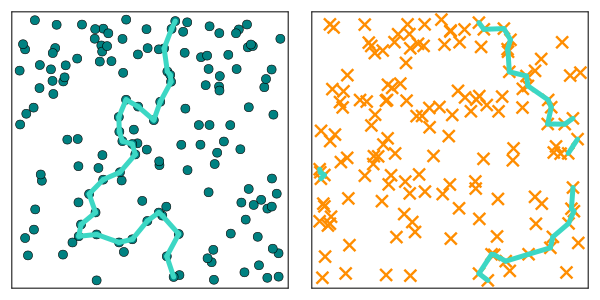

In [30]:
# Get the cycle representation for the first variable (VR_P) with a specific parameter (45)
cr_P = get_cyclerep_Eirene(VR_P, 45)

# Get the cycle representation for the second variable (VR_Q) with a specific parameter (40)
cr_Q = get_cyclerep_Eirene(VR_Q, 40)

# Plot the cycle representation for the first dataset (P_2d) on a square torus
p1 = plot_cycle_single_square_torus(P_2d, cycle = cr_P, title = ""; 
                                    legend = false,  # Disable legend for this plot
                                    cycle_color = "#3cd7c4",  # Set the color of the cycle
                                    markersize = 5,  # Set the size of the markers
                                    c = "#008181")  # Set the color of the plot

# Plot the cycle representation for the second dataset (Q_2d) on a square torus
p2 = plot_cycle_single_square_torus(Q_2d, cycle = cr_Q, title = ""; 
                                    markersize = 6,  # Set the size of the markers
                                    marker = :xcross,  # Use cross markers for this plot
                                    cycle_color = "#3cd7c4",  # Set the color of the cycle
                                    markerstrokewidth = 4,  # Set the stroke width of the markers
                                    c = "#ff8d00",  # Set the color of the plot
                                    legend = false)  # Disable legend for this plot

# Combine the two plots (p1 and p2) into a single layout with 1 row and 2 columns
plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/torus_two_samples/analogous_cycle_rep_2.pdf")  # Save the combined plot as a PDF (commented out)